In [ ]:
import numpy as np # lineer Cebir
import pandas as pd # veri işleme
import os
print(os.listdir("/content/drive/MyDrive/data"))

['train', 'validation', 'test']


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/data'

train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/validation'
test_dir = '/content/drive/MyDrive/data/test'

train_benign_dir ='/content/drive/MyDrive/data/train/benign'
train_malignant_dir = '/content/drive/MyDrive/data/train/malignant'

validation_benign_dir = '/content/drive/MyDrive/data/validation/benign'
validation_malignant_dir ='/content/drive/MyDrive/data/validation/malignant'

test_benign_dir = '/content/drive/MyDrive/data/test/benign'
test_malignant_dir = '/content/drive/MyDrive/data/test/malignant'

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
#sigmoid kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# ikili sınıflandırma var (hasta ve sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 130s 6s/step - loss: 0.6858 - acc: 0.5500 - val_loss: 0.6585 - val_acc: 0.5950
Epoch 2/5
20/20 [==============================] - 75s 4s/step - loss: 0.6667 - acc: 0.5800 - val_loss: 0.6756 - val_acc: 0.5700
Epoch 3/5
20/20 [==============================] - 53s 3s/step - loss: 0.6458 - acc: 0.6555 - val_loss: 0.5469 - val_acc: 0.7750
Epoch 4/5
20/20 [==============================] - 55s 3s/step - loss: 0.6088 - acc: 0.6425 - val_loss: 0.5421 - val_acc: 0.7850
Epoch 5/5
20/20 [==============================] - 38s 2s/step - loss: 0.5782 - acc: 0.6864 - val_loss: 0.5131 - val_acc: 0.7600


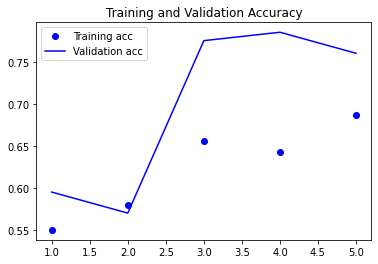

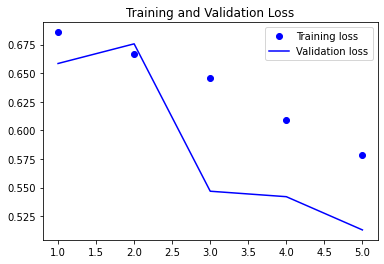

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('orjinal.h5')

In [ ]:
history = model.fit( 
                train_generator,
                steps_per_epoch = 20,
                epochs = 10,#epoch sayısını 10 a çıkardım.
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/10
20/20 [==============================] - 34s 2s/step - loss: 0.5539 - acc: 0.7300 - val_loss: 0.4597 - val_acc: 0.8050
Epoch 2/10
20/20 [==============================] - 26s 1s/step - loss: 0.5485 - acc: 0.7375 - val_loss: 0.4590 - val_acc: 0.7700
Epoch 3/10
20/20 [==============================] - 25s 1s/step - loss: 0.5435 - acc: 0.7175 - val_loss: 0.4612 - val_acc: 0.7850
Epoch 4/10
20/20 [==============================] - 26s 1s/step - loss: 0.5459 - acc: 0.7250 - val_loss: 0.4557 - val_acc: 0.7950
Epoch 5/10
20/20 [==============================] - 25s 1s/step - loss: 0.5358 - acc: 0.7275 - val_loss: 0.4246 - val_acc: 0.8000
Epoch 6/10
20/20 [==============================] - 23s 1s/step - loss: 0.5197 - acc: 0.7250 - val_loss: 0.3988 - val_acc: 0.8350
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 0.4864 - acc: 0.7584 - val_loss: 0.4121 - val_acc: 0.7950
Epoch 8/10
20/20 [==============================] - 22s 1s/step - loss: 0.4750 - acc: 0.77

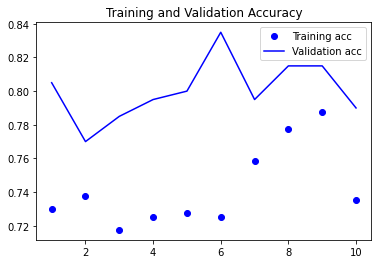

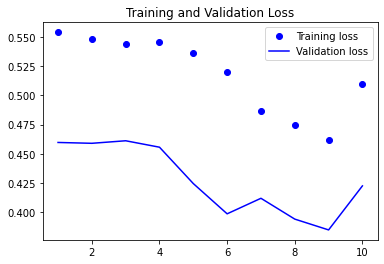

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('epoch10.h5')

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
# fonksiyonu sigmoid olarak kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# çünki ikili sınıflandırma var (hasta, sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                #steps_per_epoch = 20, #default epoch step gelecek
                epochs = 20,
                validation_data = validation_generator)
               # validation_steps = 10) #default validation step

Epoch 1/20
106/106 [==============================] - 325s 3s/step - loss: 0.6188 - acc: 0.6543 - val_loss: 0.4586 - val_acc: 0.7917
Epoch 2/20
106/106 [==============================] - 109s 1s/step - loss: 0.5391 - acc: 0.7212 - val_loss: 0.4413 - val_acc: 0.8106
Epoch 3/20
106/106 [==============================] - 109s 1s/step - loss: 0.4937 - acc: 0.7686 - val_loss: 0.5146 - val_acc: 0.7652
Epoch 4/20
106/106 [==============================] - 109s 1s/step - loss: 0.4903 - acc: 0.7568 - val_loss: 0.4010 - val_acc: 0.8277
Epoch 5/20
106/106 [==============================] - 109s 1s/step - loss: 0.4654 - acc: 0.7705 - val_loss: 0.3625 - val_acc: 0.8674
Epoch 6/20
106/106 [==============================] - 119s 1s/step - loss: 0.4552 - acc: 0.7743 - val_loss: 0.3593 - val_acc: 0.8580
Epoch 7/20
106/106 [==============================] - 111s 1s/step - loss: 0.4381 - acc: 0.7871 - val_loss: 0.4010 - val_acc: 0.7822
Epoch 8/20
106/106 [==============================] - 109s 1s/step - 

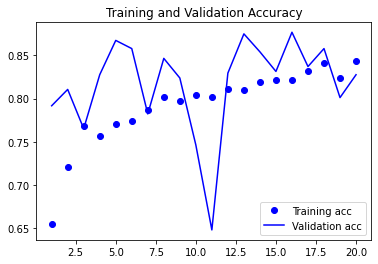

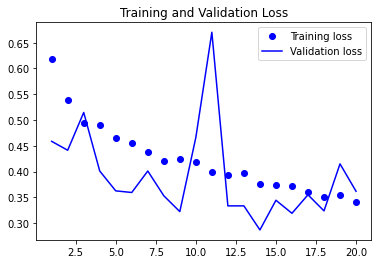

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('defaultstep.h5')

In [ ]:
history = model.fit(
                train_generator,
                #steps_per_epoch = 20, #default epoch step gelecek
                epochs = 20,
                validation_data = validation_generator,
                validation_steps = 10) 

Epoch 1/20
106/106 [==============================] - 100s 946ms/step - loss: 0.3410 - acc: 0.8359 - val_loss: 0.3249 - val_acc: 0.8400
Epoch 2/20
106/106 [==============================] - 102s 966ms/step - loss: 0.3328 - acc: 0.8435 - val_loss: 0.3532 - val_acc: 0.8100
Epoch 3/20
106/106 [==============================] - 101s 948ms/step - loss: 0.3211 - acc: 0.8535 - val_loss: 0.2855 - val_acc: 0.8400
Epoch 4/20
106/106 [==============================] - 101s 953ms/step - loss: 0.3227 - acc: 0.8459 - val_loss: 0.4153 - val_acc: 0.7950
Epoch 5/20
106/106 [==============================] - 101s 952ms/step - loss: 0.3101 - acc: 0.8592 - val_loss: 0.4076 - val_acc: 0.8300
Epoch 6/20
106/106 [==============================] - 101s 951ms/step - loss: 0.3111 - acc: 0.8563 - val_loss: 0.3036 - val_acc: 0.8450
Epoch 7/20
106/106 [==============================] - 101s 949ms/step - loss: 0.2991 - acc: 0.8663 - val_loss: 0.2200 - val_acc: 0.9200
Epoch 8/20
106/106 [============================

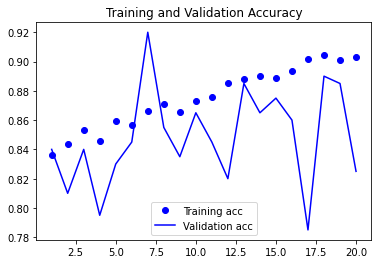

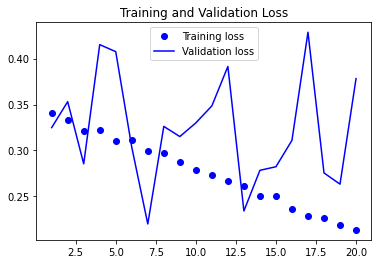

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('deneme.h5')